<a href="https://colab.research.google.com/github/PawanKumarrr/Bitcoin-Price-Prediction-and-Recommendation-system--using-Machine-Learning-and-sentiment-analysis/blob/main/Copy_of_Bitcoin_Price_Prediction_and_Recommendation_system_using_Machine_Learning_and_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the api for fetching the data

In [ ]:
!pip3 install alpha_vantage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 17.5 MB/s eta 0:00:00


In [ ]:
!pip3 install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4473 sha256=9c1d4e7d0ad70c64f247a5985231977e46c2aefaced861fdaccbe7d3993e5ef1
  Stored in directory: /root/.cache/pip/wheels/b6/26/c1/ce3fdf93e63c11019da18dbeec4c09309d3edc5461c2a5fffb
Successfully built preprocessor


In [ ]:
!pip3 install tweepy==4.12

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.13.0
    Uninstalling tweepy-4.13.0:
      Successfully uninstalled tweepy-4.13.0


In [ ]:
#**************** IMPORT PACKAGES ********************
from flask import Flask, render_template, request, flash, redirect, url_for
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
#model = ARIMA(dataFrame.columnName, order=(1,0,0))
#from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import math, random
from datetime import datetime
import datetime as dt
import yfinance as yf
#library for twitter sentiment analysis
import re
import tweepy
from tweepy import OAuthHandler
import preprocessor as p
import re
from sklearn.linear_model import LinearRegression
from textblob import TextBlob
#import constants as ct
#import Tweet
import nltk
nltk.download('punkt')

from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.arima_model import ARIMA
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import tweepy

Vantage API KEY =4DTXRVH7Z2V12C4Z

In [ ]:
!pip3 install cryptocmd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
from cryptocmd import CmcScraper

# initialise scraper without time interval for max historical data
scraper = CmcScraper("BTC")
# Pandas dataFrame for the same data
df = scraper.get_dataframe()
# initialise scraper with time interval for e.g a year from today
scraper = CmcScraper("BTC", "1-1-2014", "1-10-2022")
# Pandas dataFrame for the same data
df = scraper.get_dataframe()
df.to_csv('Crypto'+'.csv',index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3196 non-null   datetime64[ns]
 1   Open        3196 non-null   float64       
 2   High        3196 non-null   float64       
 3   Low         3196 non-null   float64       
 4   Close       3196 non-null   float64       
 5   Volume      3196 non-null   float64       
 6   Market Cap  3196 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 174.9 KB


In [ ]:
df['Date']

0      2022-10-01
1      2022-09-30
2      2022-09-29
3      2022-09-28
4      2022-09-27
          ...    
3191   2014-01-05
3192   2014-01-04
3193   2014-01-03
3194   2014-01-02
3195   2014-01-01
Name: Date, Length: 3196, dtype: datetime64[ns]

In [ ]:
df.head(20)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2022-10-01,19431.104946,19471.154867,19231.081874,19312.094732,1.871954e+10,3.701427e+11
1,2022-09-30,19573.431421,20109.850301,19265.662400,19431.789447,4.397525e+10,3.724147e+11
2,2022-09-29,19427.780191,19589.266211,18924.353453,19573.050314,4.103784e+10,3.751009e+11
3,2022-09-28,19104.620790,19688.344373,18553.297358,19426.721332,5.307130e+10,3.722796e+11
4,2022-09-27,19221.840713,20338.455461,18915.668722,19110.546551,5.857144e+10,3.662027e+11
5,2022-09-26,18803.900633,19274.873498,18721.285851,19222.672184,4.414880e+10,3.683359e+11
6,2022-09-25,18936.311515,19134.733194,18696.468304,18802.097976,2.335997e+10,3.602593e+11
7,2022-09-24,19296.990704,19310.197608,18861.973999,18937.011176,2.614964e+10,3.628265e+11
8,2022-09-23,19412.399925,19464.672348,18617.553010,19297.637840,3.889608e+10,3.697190e+11
9,2022-09-22,18534.649595,19456.910901,18415.591497,19413.551621,4.113577e+10,3.719240e+11


ARIMA MODEL

In [ ]:
df.astype

<bound method NDFrame.astype of            Date          Open          High           Low         Close  \
0    2022-10-01  19431.104946  19471.154867  19231.081874  19312.094732   
1    2022-09-30  19573.431421  20109.850301  19265.662400  19431.789447   
2    2022-09-29  19427.780191  19589.266211  18924.353453  19573.050314   
3    2022-09-28  19104.620790  19688.344373  18553.297358  19426.721332   
4    2022-09-27  19221.840713  20338.455461  18915.668722  19110.546551   
...         ...           ...           ...           ...           ...   
3191 2014-01-05    858.549988    952.400024    854.520020    933.530029   
3192 2014-01-04    823.270020    859.510010    801.669983    859.510010   
3193 2014-01-03    802.849976    834.150024    789.119995    818.719971   
3194 2014-01-02    773.440002    820.309998    767.210022    802.390015   
3195 2014-01-01    754.969971    775.349976    754.969971    771.400024   

            Volume    Market Cap  
0     1.871954e+10  3.701427e+11

In [ ]:
#******************** ARIMA SECTION ********************
def ARIMA_ALGO(df):
  # def parser(x):
  #           return datetime.strptime(x, '%Y-%m-%d')
  def arima_model(train, test):
            history = [x for x in train]
            predictions = list()
            for t in range(len(test)):
                model = ARIMA(history, order=(6,1 ,0))
                model_fit = model.fit()
                output = model_fit.forecast()
                yhat = output[0]
                #print(yhat)
                predictions.append(yhat)
                obs = test[t]
                history.append(obs)
            return predictions
  quantity = df['Close'].tolist()
  # print(quantity[0])
  # print(len(quantity))
  size = int(len(quantity) * 0.80)
  train, test = quantity[0:size], quantity[size:len(quantity)]
  # print(train)
  # print(test)
  #fit in model
  predictions = arima_model(train, test)
  #plot graph
  test_day = [t
           for t in range(len(test))]

  fig = plt.figure(figsize=(9,8),dpi=65)
  plt.plot(test,label='Actual Price')
  plt.plot(predictions,label='Predicted Price')
  plt.title('Closing Price Prediction by ARIMA')
  plt.legend(loc='best')
  # plt.savefig('static/ARIMA.png')
  # plt.close(fig)
  print()
  print("##############################################################################")
  arima_pred=predictions[-2]
  print("Tomorrow's Closing Price Prediction by ARIMA:",arima_pred)
  #rmse calculation
  error_arima = math.sqrt(mean_squared_error(test, predictions))
  print("ARIMA RMSE:",error_arima)
  print("##############################################################################")
  return arima_pred, error_arima




##############################################################################
Tomorrow's Closing Price Prediction by ARIMA: 822.9634590801202
ARIMA RMSE: 17.896731599768113
##############################################################################
822.9634590801202


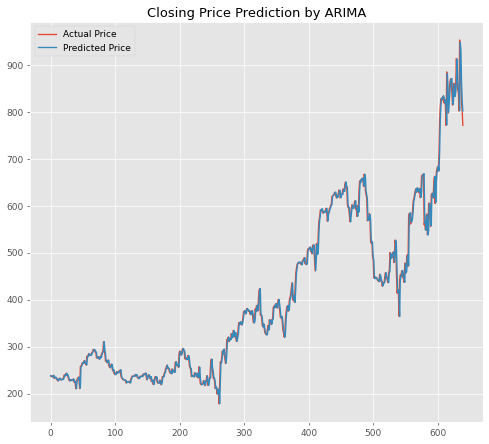

In [ ]:
arima_pred, error_arima=ARIMA_ALGO(df)
print(arima_pred)

In [ ]:
    #************* LSTM SECTION **********************

    def LSTM_ALGO(df):
        #Split data into training set and test set
        dataset_train=df.iloc[0:int(0.8*len(df)),:]
        dataset_test=df.iloc[int(0.8*len(df)):,:]
        ############# NOTE #################
        #TO PREDICT STOCK PRICES OF NEXT N DAYS, STORE PREVIOUS N DAYS IN MEMORY WHILE TRAINING
        # HERE N=7
        ###dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
        training_set=df.iloc[:,4:5].values# 1:2, to store as numpy array else Series obj will be stored
        #select cols using above manner to select as float64 type, view in var explorer

        #Feature Scaling
        from sklearn.preprocessing import MinMaxScaler
        sc=MinMaxScaler(feature_range=(0,1))#Scaled values btween 0,1
        training_set_scaled=sc.fit_transform(training_set)
        #In scaling, fit_transform for training, transform for test

        #Creating data stucture with 7 timesteps and 1 output.
        #7 timesteps meaning storing trends from 7 days before current day to predict 1 next output
        X_train=[]#memory with 7 days from day i
        y_train=[]#day i
        for i in range(7,len(training_set_scaled)):
            X_train.append(training_set_scaled[i-7:i,0])
            y_train.append(training_set_scaled[i,0])
        #Convert list to numpy arrays
        X_train=np.array(X_train)
        y_train=np.array(y_train)
        X_forecast=np.array(X_train[-1,1:])
        X_forecast=np.append(X_forecast,y_train[-1])
        #Reshaping: Adding 3rd dimension
        X_train=np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))#.shape 0=row,1=col
        X_forecast=np.reshape(X_forecast, (1,X_forecast.shape[0],1))
        #For X_train=np.reshape(no. of rows/samples, timesteps, no. of cols/features)

        #Building RNN
        from keras.models import Sequential
        from keras.layers import Dense
        from keras.layers import Dropout
        from keras.layers import LSTM

        #Initialise RNN
        regressor=Sequential()

        #Add first LSTM layer
        regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
        #units=no. of neurons in layer
        #input_shape=(timesteps,no. of cols/features)
        #return_seq=True for sending recc memory. For last layer, retrun_seq=False since end of the line
        regressor.add(Dropout(0.1))

        #Add 2nd LSTM layer
        regressor.add(LSTM(units=50,return_sequences=True))
        regressor.add(Dropout(0.1))

        #Add 3rd LSTM layer
        regressor.add(LSTM(units=50,return_sequences=True))
        regressor.add(Dropout(0.1))

        #Add 4th LSTM layer
        regressor.add(LSTM(units=50))
        regressor.add(Dropout(0.1))

        #Add o/p layer
        regressor.add(Dense(units=1))

        #Compile
        regressor.compile(optimizer='adam',loss='mean_squared_error')

        #Training
        regressor.fit(X_train,y_train,epochs=50,batch_size=32 )
        #For lstm, batch_size=power of 2

        #Testing
        ###dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
        real_stock_price=dataset_test.iloc[:,4:5].values

        #To predict, we need stock prices of 7 days before the test set
        #So combine train and test set to get the entire data set
        dataset_total=pd.concat((dataset_train['Close'],dataset_test['Close']),axis=0)
        testing_set=dataset_total[ len(dataset_total) -len(dataset_test) -7: ].values
        testing_set=testing_set.reshape(-1,1)
        #-1=till last row, (-1,1)=>(80,1). otherwise only (80,0)

        #Feature scaling
        testing_set=sc.transform(testing_set)

        #Create data structure
        X_test=[]
        for i in range(7,len(testing_set)):
            X_test.append(testing_set[i-7:i,0])
            #Convert list to numpy arrays
        X_test=np.array(X_test)

        #Reshaping: Adding 3rd dimension
        X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

        #Testing Prediction
        predicted_stock_price=regressor.predict(X_test)

        #Getting original prices back from scaled values
        predicted_stock_price=sc.inverse_transform(predicted_stock_price)
        fig = plt.figure(figsize=(7.2,4.8),dpi=65)
        plt.plot(real_stock_price,label='Actual Price')
        plt.plot(predicted_stock_price,label='Predicted Price')

        plt.legend(loc=4)
        # plt.savefig('static/LSTM.png')
        # plt.close(fig)


        error_lstm = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))


        #Forecasting Prediction
        forecasted_stock_price=regressor.predict(X_forecast)

        #Getting original prices back from scaled values
        forecasted_stock_price=sc.inverse_transform(forecasted_stock_price)

        lstm_pred=forecasted_stock_price[0,0]
        print()
        print("##############################################################################")
        print("Tomorrow's  Closing Price Prediction by LSTM: ",lstm_pred)
        print("LSTM RMSE:",error_lstm)
        print("##############################################################################")
        return lstm_pred,error_lstm

Epoch 1/50
100/100 [==============================] - 11s 19ms/step - loss: 0.0092
Epoch 2/50
100/100 [==============================] - 2s 20ms/step - loss: 0.0013
Epoch 3/50
100/100 [==============================] - 3s 31ms/step - loss: 0.0015
Epoch 4/50
100/100 [==============================] - 2s 25ms/step - loss: 0.0011
Epoch 5/50
100/100 [==============================] - 2s 20ms/step - loss: 0.0012
Epoch 6/50
100/100 [==============================] - 2s 22ms/step - loss: 0.0011
Epoch 7/50
100/100 [==============================] - 2s 20ms/step - loss: 9.7011e-04
Epoch 8/50
100/100 [==============================] - 2s 20ms/step - loss: 9.5579e-04
Epoch 9/50
100/100 [==============================] - 3s 33ms/step - loss: 0.0010
Epoch 10/50
100/100 [==============================] - 2s 20ms/step - loss: 0.0010
Epoch 11/50
100/100 [==============================] - 2s 21ms/step - loss: 0.0010
Epoch 12/50
100/100 [==============================] - 2s 21ms/step - loss: 0.0010
Epoc

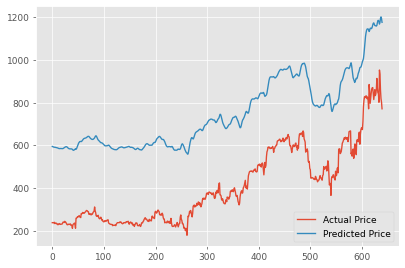

In [ ]:
lstm_pred, error_lstm=LSTM_ALGO(df)

In [ ]:
#***************** LINEAR REGRESSION SECTION ******************
def LIN_REG_ALGO(df):
        #No of days to be forcasted in future
        forecast_out = int(7)
        #Price after n days
        df['Close after n days'] = df['Close'].shift(-forecast_out)
        #New df with only relevant data
        df_new=df[['Close','Close after n days']]

        #Structure data for train, test & forecast
        #lables of known data, discard last 35 rows
        y =np.array(df_new.iloc[:-forecast_out,-1])
        y=np.reshape(y, (-1,1))
        #all cols of known data except lables, discard last 35 rows
        X=np.array(df_new.iloc[:-forecast_out,0:-1])
        #Unknown, X to be forecasted
        X_to_be_forecasted=np.array(df_new.iloc[-forecast_out:,0:-1])

        #Traning, testing to plot graphs, check accuracy
        X_train=X[0:int(0.8*len(df)),:]
        X_test=X[int(0.8*len(df)):,:]
        y_train=y[0:int(0.8*len(df)),:]
        y_test=y[int(0.8*len(df)):,:]

        # Feature Scaling===Normalization
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        X_to_be_forecasted=sc.transform(X_to_be_forecasted)

        #Training
        clf = LinearRegression(n_jobs=-1)
        clf.fit(X_train, y_train)

        #Testing
        y_test_pred=clf.predict(X_test)
        y_test_pred=y_test_pred*(1.04)
        import matplotlib.pyplot as plt2
        fig = plt2.figure(figsize=(7.2,4.8),dpi=65)
        plt2.plot(y_test,label='Actual Price' )
        plt2.plot(y_test_pred,label='Predicted Price')

        plt2.legend(loc=4)
        # plt2.savefig('static/LR.png')
        # plt2.close(fig)

        error_lr = math.sqrt(mean_squared_error(y_test, y_test_pred))


        #Forecasting
        forecast_set = clf.predict(X_to_be_forecasted)
        forecast_set=forecast_set*(1.04)
        mean=forecast_set.mean()
        lr_pred=forecast_set[0,0]
        print()
        print("##############################################################################")
        print("Tomorrow's  Closing Price Prediction by Linear Regression: ",lr_pred)
        print("Linear Regression RMSE:",error_lr)
        print("##############################################################################")
        return df, lr_pred, forecast_set, mean, error_lr


##############################################################################
Tomorrow's  Closing Price Prediction by Linear Regression:  901.4473971747268
Linear Regression RMSE: 89.53866179104529
##############################################################################


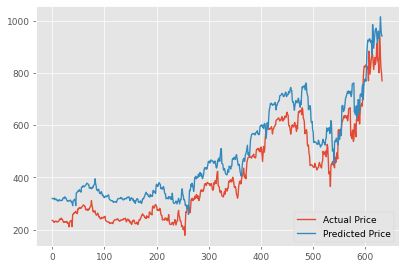

In [ ]:
df, lr_pred, forecast_set,mean,error_lr=LIN_REG_ALGO(df)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
csv_path="/content/drive/MyDrive/BTC-USD.csv"


In [ ]:
consumer_key= 'EapsMXCAlvSlvZVjm3dZZpqjq'
consumer_secret= 'Gfo5UEsRcodvGIil8slJZjJfDEAlbGQxpnTunoIZheQWJ7SpZ8'

access_token='1583900656741412864-gDlhDp4KCpezjuS19RILx4k9j4Poru'
access_token_secret='d5uOtSGh9ibqw5FKrhWjdWWlknKmZZa224JrpiUdpAKvQ'

bearer_token='AAAAAAAAAAAAAAAAAAAAAIZOigEAAAAAvfnlObOvMKFeGHh2YwqbqeWJJUI%3DAHKkiCbma67VI59srbrbthzW4qLsWWs4N8sUXkOQCk6EWFpqEw'



In [ ]:
class Tweet(object):

  def __init__(self, content, polarity):
    self.content = content
    self.polarity = polarity


In [ ]:
    #**************** SENTIMENT ANALYSIS **************************
def retrieving_tweets_polarity(symbol):
      stock_ticker_map = pd.read_csv(csv_path)
      #number of positive tweets
      pos=0
      #number of negative tweet
      neg=0
      tweet_list = [] #List of tweets alongside polarity
      global_polarity = 0 #Polarity of all tweets === Sum of polarities of individual tweets
      tw_list=[] #List of tweets only => to be displayed on web page

      def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

      ## to get the authentication done
      try:
            # create OAuthHandler object
            ## set access token and secret
            # create tweepy API object to fetch tweets
            # api = tweepy.API(auth)
            client = tweepy.Client('AAAAAAAAAAAAAAAAAAAAAIZOigEAAAAATO0%2BsPZrI2e%2FroyKb6JcbBLqa6M%3Dz1tFtAmsJwhwKa222qHMrd5LYou2mAVcmPKdqmZOh0wWBdfZaz')
      except tweepy.TweepError as e:
            print("Error: Authentication Failed")

      # call twitter api to fetch tweets
      # fetched_tweets = api.search("BTC-USD", 300)
      try:
        query = "#BTC -is:retweet lang:en"
        tweets = client.search_recent_tweets(query=query, tweet_fields=['text'], max_results=100)
        #print(tweets)
      except tweepy.TweepError as e:
        print("Could not get Tweets")
        print(e)

      num_tweets=tweets.meta["result_count"]

      # parsing tweets one by one
      for tweet in tweets.data:
         try:
           #print(tweet.text)
           tw=clean_tweet(tweet.text)
           blob=TextBlob(tw)
           #print(blob)
           polarity = 0 #Polarity of single individual tweet
           for sentence in blob.sentences:
             polarity += sentence.sentiment.polarity
             if polarity>0:
               pos=pos+1
             if polarity<0:
                neg=neg+1

           global_polarity += polarity
           tweet_list.append(Tweet(tw, polarity))
         except Exception as e:
           print("Could not parse Tweets")
           print(e)



      if len(tweet_list) != 0:
            global_polarity = global_polarity / len(tweet_list)
      else:
            global_polarity = global_polarity
      neutral=num_tweets-pos-neg
      if neutral<0:
        neg=neg+neutral
        neutral=20

      print("##############################################################################")
      print("Positive Tweets :",pos,"Negative Tweets :",neg,"Neutral Tweets :",neutral)
      print("##############################################################################")
      labels=['Positive','Negative','Neutral']
      sizes = [pos,neg,neutral]
      explode = (0, 0, 0)
      fig = plt.figure(figsize=(7.2,4.8),dpi=65)
      fig1, ax1 = plt.subplots(figsize=(7.2,4.8),dpi=65)
      ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
        # Equal aspect ratio ensures that pie is drawn as a circle
      # ax1.axis('equal')
      #   plt.tight_layout()
      #   plt.savefig('static/SA.png')
      #   plt.close(fig)
      #   #plt.show()
      if global_polarity>0:
            print()
            print("##############################################################################")
            print("Tweets Polarity: Overall Positive")
            print("##############################################################################")
            tw_pol="Overall Positive"
      else:
            print()
            print("##############################################################################")
            print("Tweets Polarity: Overall Negative")
            print("##############################################################################")
            tw_pol="Overall Negative"
      return global_polarity,tweet_list,tw_pol,pos,neg,neutral




##############################################################################
Positive Tweets : 38 Negative Tweets : 10 Neutral Tweets : 52
##############################################################################

##############################################################################
Tweets Polarity: Overall Positive
##############################################################################


<Figure size 468x312 with 0 Axes>

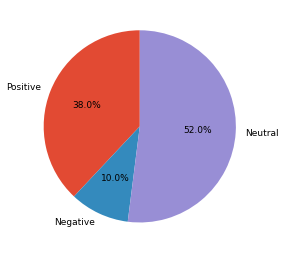

In [ ]:
polarity,tw_list,tw_pol,pos,neg,neutral=retrieving_tweets_polarity('btc')


In [ ]:
 def recommending(df, global_polarity,today_crypto,mean):
        if today_crypto.iloc[-1]['Close'] < mean:
            if global_polarity > 0:
                idea="RISE"
                decision="BUY"
                print()
                print("##############################################################################")
                print("According to the ML Predictions and Sentiment Analysis of Tweets, a",idea,"in",'btc',"Bitcoin is expected => ",decision)
            elif global_polarity <= 0:
                idea="FALL"
                decision="SELL"
                print()
                print("##############################################################################")
                print("According to the ML Predictions and Sentiment Analysis of Tweets, a",idea,"in",'btc',"Bitcoin is expected => ",decision)
        else:
            idea="FALL"
            decision="SELL"
            print()
            print("##############################################################################")
            print("According to the ML Predictions and Sentiment Analysis of Tweets, a",idea,"in",'btc',"Bitcoin is expected => ",decision)
        return idea, decision





##############################################################################
Tomorrow's Closing Price Prediction by ARIMA: 822.9634590801202
ARIMA RMSE: 17.896731599768113
##############################################################################


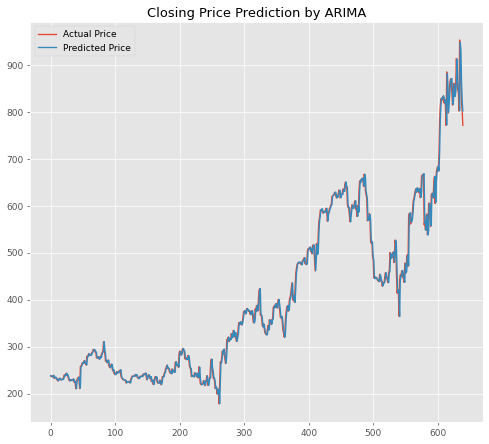

In [ ]:
arima_pred, error_arima=ARIMA_ALGO(df)

Epoch 1/50
100/100 [==============================] - 12s 22ms/step - loss: 0.0112
Epoch 2/50
100/100 [==============================] - 2s 20ms/step - loss: 0.0012
Epoch 3/50
100/100 [==============================] - 2s 21ms/step - loss: 0.0012
Epoch 4/50
100/100 [==============================] - 2s 19ms/step - loss: 0.0011
Epoch 5/50
100/100 [==============================] - 3s 29ms/step - loss: 0.0011
Epoch 6/50
100/100 [==============================] - 3s 28ms/step - loss: 0.0011
Epoch 7/50
100/100 [==============================] - 2s 21ms/step - loss: 0.0012
Epoch 8/50
100/100 [==============================] - 2s 21ms/step - loss: 0.0010
Epoch 9/50
100/100 [==============================] - 2s 21ms/step - loss: 0.0011
Epoch 10/50
100/100 [==============================] - 2s 20ms/step - loss: 9.5516e-04
Epoch 11/50
100/100 [==============================] - 2s 25ms/step - loss: 9.6883e-04
Epoch 12/50
100/100 [==============================] - 3s 31ms/step - loss: 0.0010
Epoc

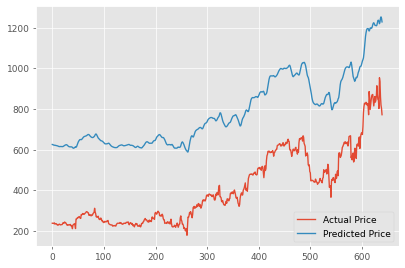

In [ ]:
lstm_pred, error_lstm=LSTM_ALGO(df)


##############################################################################
Tomorrow's  Closing Price Prediction by Linear Regression:  901.4473971747268
Linear Regression RMSE: 89.53866179104529
##############################################################################


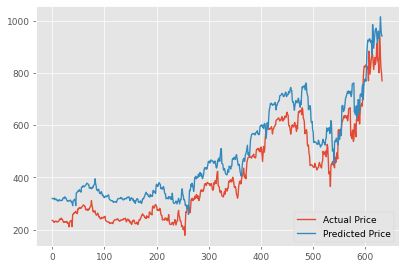

In [ ]:
df, lr_pred, forecast_set,mean,error_lr=LIN_REG_ALGO(df)

##############################################################################
Positive Tweets : 40 Negative Tweets : 5 Neutral Tweets : 55
##############################################################################

##############################################################################
Tweets Polarity: Overall Positive
##############################################################################


<Figure size 468x312 with 0 Axes>

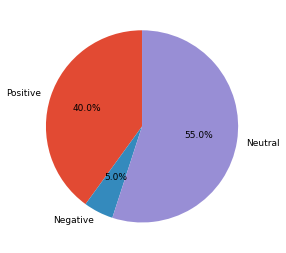

In [ ]:
polarity,tw_list,tw_pol,pos,neg,neutral = retrieving_tweets_polarity('btc')

In [ ]:
df=pd.read_csv('/content/Crypto.csv')
today_crypto=df.iloc[-1:]

decision=recommending(df,polarity,today_crypto,arima_pred)


##############################################################################
According to the ML Predictions and Sentiment Analysis of Tweets, a RISE in btc Bitcoin is expected =>  BUY
